# WORDCLOUD EVO MORALES

In [2]:
import json
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stopwordspanish =  stopwords.words('spanish')
from nltk import tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
data = pd.read_excel("evomorales.xlsx")

In [38]:
data.head(10)

,Tweet ID (click to view url),Retweets,Comments,Favorites,Is Retweet?,Date,comment,Tweet Source,Status URL
0,ID: 1185906233594777600,1720.0,1083.0,3975.0,no,2019-10-20 13:10:53,Al sufragar cumplimos con un deber democrático...,Twitter for iPhone,view tweet url
1,ID: 1185911686986903558,1.0,NaN,1.0,no,2019-10-20 13:32:34,Arriba ! povo boliviano ❤️✊,Twitter for Android,view tweet url
2,ID: 1185912135139889152,4.0,5.0,6.0,no,2019-10-20 13:34:20,"Vamos hermano Evo, Bolivia vive una fiesta de...",Twitter for Android,view tweet url
3,ID: 1185912308968636416,5.0,2.0,126.0,no,2019-10-20 13:35:02,https://t.co/2WiAZDd1cN,Twitter for Android,view tweet url
4,ID: 1185913369653661696,7.0,23.0,21.0,no,2019-10-20 13:39:15,Bolivianos no dejen ir a Evo miren un ejemplo...,Twitter for Android,view tweet url
5,ID: 1185919471954923521,1.0,16.0,16.0,no,2019-10-20 14:03:30,"Fuerza querido , está Argentina te desea lo ...",Twitter for Android,view tweet url
6,ID: 1185920102140665862,NaN,NaN,4.0,no,2019-10-20 14:06:00,Suerte cariño❤️,Twitter for Android,view tweet url
7,ID: 1185920646397775872,NaN,NaN,4.0,no,2019-10-20 14:08:10,Calla kk,Twitter for Android,view tweet url
8,ID: 1185920952200237056,NaN,8.0,2.0,no,2019-10-20 14:09:23,"SUERTE AMIGO EVO, UN ABRAZO, DESDE VENEZUELA.",Twitter for Android,view tweet url
9,ID: 1185921476794474497,NaN,NaN,5.0,no,2019-10-20 14:11:28,https://t.co/Igb8jnPEUq,Twitter Web App,view tweet url


In [39]:
data.describe()

,Retweets,Comments,Favorites
count,28.000000,23.000000,77.000000
mean,213.178571,75.521739,117.116883
std,840.533739,244.107627,671.415590
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000
50%,2.000000,4.000000,2.000000
75%,4.000000,12.000000,6.000000
max,4170.000000,1083.000000,4414.000000


In [40]:
data.dtypes

Tweet ID (click to view url)            object
Retweets                               float64
Comments                               float64
Favorites                              float64
Is Retweet?                             object
Date                            datetime64[ns]
comment                                 object
Tweet Source                            object
Status URL                              object
dtype: object

### Limpieza de datos
#### Ver si exiten comentarios en blanco (si es una imagen y luego eliminarlas)

In [41]:
pd.isnull(data["comment"]).values.ravel().sum()

0

In [42]:
pd.notnull(data["comment"]).values.ravel().sum()

100

In [43]:
data = data.dropna(axis = 0, subset=['comment'], how="any")

In [44]:
data.count()

Tweet ID (click to view url)    100
Retweets                         28
Comments                         23
Favorites                        77
Is Retweet?                     100
Date                            100
comment                         100
Tweet Source                    100
Status URL                      100
dtype: int64

In [45]:
text = data.comment[0]
text

u'Al sufragar cumplimos con un deber democr\xe1tico. Convoco al pueblo boliviano a emitir su voto y elegir autoridades para que nuestra querida #Bolivia se mantenga como modelo de democracia. Somos muy optimistas, tenemos mucha confianza, fundamentalmente en la democracia. https://t.co/bszEf3OrFZ'

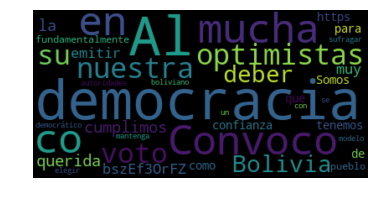

In [46]:
#GENERADOS DE WORCLOUD
wordcloud = WordCloud().generate(text)

# Mostrando la imagen generada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

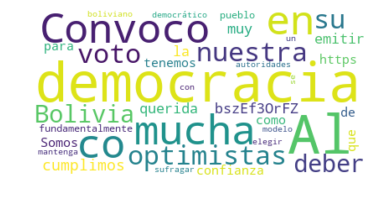

In [47]:
# Bajando el TAMAÑO DE FUENTE,
# MODIFICANDO HIPERPARAMETROSS
wordcloud = WordCloud(max_font_size=100, max_words=120, background_color="White").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
# GUARDAR LA IMAGEN
wordcloud.to_file("WordCloud1.png")

In [49]:
# Combinaciones de palabras de la columna description
comentarios = " ".join(review for review in data.comment)
print ("Hay {} palabras en la combinación de los nombres de capitulos.".format(len(comentarios)))

Hay 7502 palabras en la combinación de los nombres de capitulos.


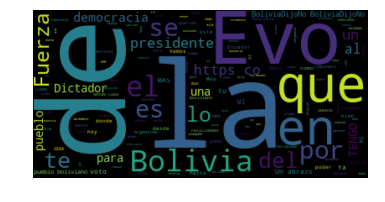

In [50]:
# WORCLOUD CON LOS COMENTARIOS

wordcloud = WordCloud(background_color="black").generate(comentarios)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### STOP WORDS EN ESPAÑOL

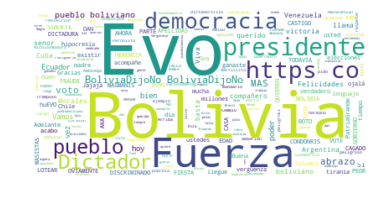

In [51]:
#Nombre capitulo con stopwords
eliminarpalabras = stopwordspanish
eliminarpalabras.append('tomas')

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwordspanish, background_color="white").generate(comentarios)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [71]:
# Creamos un array de una imagen de mascara
wine_mask = np.array(Image.open("caritas.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [72]:
# Función para transformar los valores a: 0 ó 255

def transform_format(val):
    if val == 0:
        return 255
    else:
        return 0

In [73]:
# Transforma la máscara en una nueva función
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]),np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = transform_format(wine_mask[i].any())


In [74]:
# Comprobando el resultado esperado de la máscara
transformed_wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

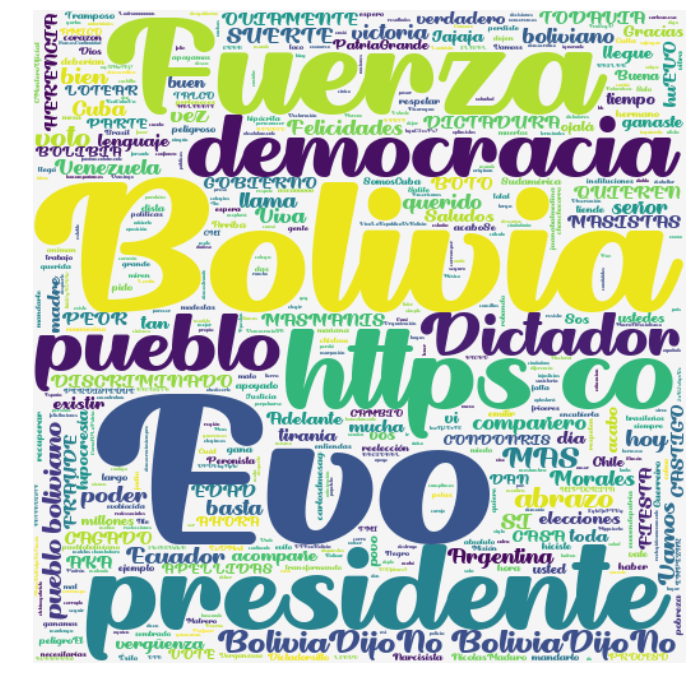

In [75]:
# Creando una imagen de nube de palabras
letra = "letra.ttf"

wc = WordCloud(font_path = letra, background_color="Whitesmoke", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwordspanish, contour_width=1, contour_color='yellow')

# Generate a wordcloud
wc.generate(comentarios)

# store to file
wc.to_file("evomoraless.png")

# show
plt.figure(figsize=[25,12])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [76]:
def transform_format(val):
    if val == 0:
        return 0
    else:
        return 255

In [77]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

In [78]:
transformed_wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

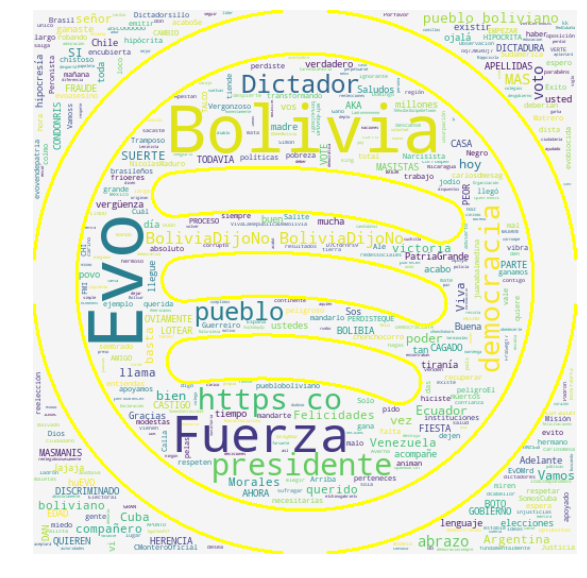

In [79]:

wc = WordCloud(background_color="whitesmoke", max_words=1000, mask=transformed_wine_mask,
               stopwords=stopwordspanish, contour_width=3, contour_color='yellow')

# Generate a wordcloud
wc.generate(comentarios)

# store to file
wc.to_file("img1.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# SALIDA

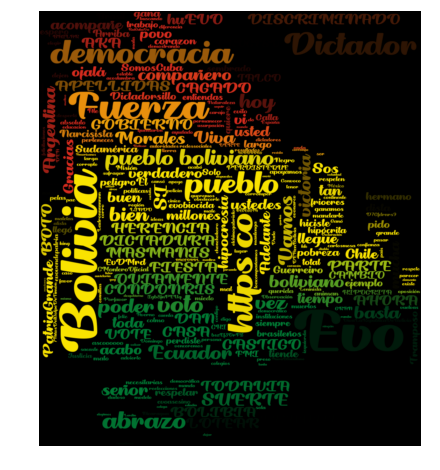

In [83]:
# Generate a word cloud image
eliminarpalabras.append('d a')
mask = np.array(Image.open("ultimo.png"))
wordcloud_spa = WordCloud(font_path = letra, stopwords=eliminarpalabras, background_color="black", max_words=1000, mask=mask).generate(comentarios)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,8])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("unapunogenerado.png", format="png")
#plt.show()

(-0.5, 1199.5, 1367.5, -0.5)

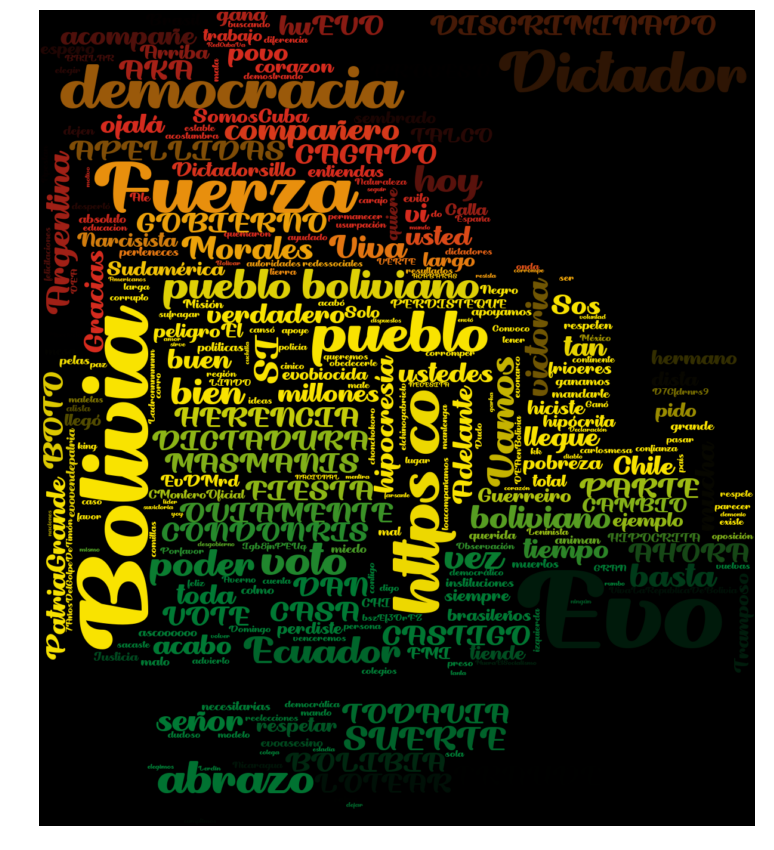

In [84]:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_spa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
